# Multiple Linear Regression

## Assignment Submission by Nitin Balaji Srinivasan, Cohort 58 - AI and ML

## Demand for Shared Bikes

#### Problem Statement & Objective:

A US bike-sharing provider BoomBikes aspires to understand the demand for shared bikes among the people following Covid-19 pandemic. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
The company wants to know:

 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands

We are required to model the demand for shared bikes with the available data to understand how exactly the demands 
vary with different features. 
This will be a multiple linear regression model for the prediction of demand for shared bikes. 

#### Steps for the model:

 - S1:Data Understanding and Data Loading
 - S2:Pre-processing Steps (Dropping Columns and Mapping of categorical values)
 - S3:EDA (Univariate, Bivariate and /or Multivariate analysis)
 - S4:Create dummy variables for all categorical variables where no. categories > 2
 - S5:Train Test Split
 - S6:Missing value imputation
 - S7:Scaling
 - S8:Feature Selection
 - S9:Model Building
 - S10:Evaluation (Train and Test Data) - R2 and Adjusted R2

 #### S1:Data Understanding and Data Loading

In [47]:
# All imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float', '{:.4f}'.format)

In [4]:
# import the source file
mlr_day_df = pd.read_csv('day.csv')

In [5]:
# Check the first five rows
mlr_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [6]:
mlr_day_df.shape

(730, 16)

In [7]:
#information on column types
mlr_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# Describe the dataset numerical columns
mlr_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [9]:
# checking for the null values in column data

mlr_day_df.isnull().sum()
#mlr_day_df.isnull().mean()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

 #### S2:Pre-processing Steps (Dropping Columns and Mapping of categorical values)

In [10]:
#Check if there are any duplicates
mlr_day_df.duplicated().any().sum()

0

In [11]:
#Check number of unique values
mlr_day_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [12]:
# Dropping unnecessary columns
# Casual and Registered seem to be breakdown of the target variable 'cnt', therefore dropping them
# instant is an index column, so needs to be dropped for the model
# dteday is the exact date column - month and year columns can support instead of exact date

unnec_cols = ['casual','registered','instant','dteday']

mlr_day_df=mlr_day_df.drop(unnec_cols,axis=1)

In [13]:
mlr_day_df.shape

(730, 12)

In [17]:
#Renaming columns hum, yr,mnth for better readability

mlr_day_df.rename(columns={'hum':'humidity', 'yr':'year','mnth':'month'}, inplace=True)

In [18]:
mlr_day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,985
1,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,801
2,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,1349
3,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,1562
4,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,1600


In [19]:
#Checking value counts for Year column

mlr_day_df.year.value_counts() 
#year (0: 2018, 1:2019)

0    365
1    365
Name: year, dtype: int64

In [20]:
#Checking value counts for Month column

mlr_day_df.month.value_counts() 
#month ( 1 to 12)



1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

In [21]:
#Checking value counts for Weathersit column
mlr_day_df.weathersit.value_counts()
#		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [22]:
#Checking value counts for Season column
mlr_day_df.season.value_counts() 
#season (1:spring, 2:summer, 3:fall, 4:winter)

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [23]:
# Encoding/mapping the categorical columns -weathersit, month, season and weekday for better readability. These have categories > 2
# Year, holiday and working day all have only 2 categories each - therefore leaving the 0 and 1s as they are.

mlr_day_df.weathersit = mlr_day_df.weathersit.map({1:'Clear',2:'Misty Cloudy',3:'Light snow rain',4:'Heavy snow rain'})
mlr_day_df.month = mlr_day_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
mlr_day_df.season = mlr_day_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
mlr_day_df.weekday = mlr_day_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


mlr_day_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,jan,0,sun,0,Misty Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,jan,0,mon,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,jan,0,tue,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,jan,0,wed,1,Clear,9.31,11.46,43.70,12.52,1600


 #### S3:EDA (Univariate, Bivariate and /or Multivariate analysis)

In [24]:
# Create lists of numerical and categorical columns for EDA

categorical_cols=['season','year','month', 'holiday','weekday','workingday','weathersit']

numerical_cols=['temp','atemp','humidity','windspeed','cnt']

Column: temp, Missing Data: 0.00%


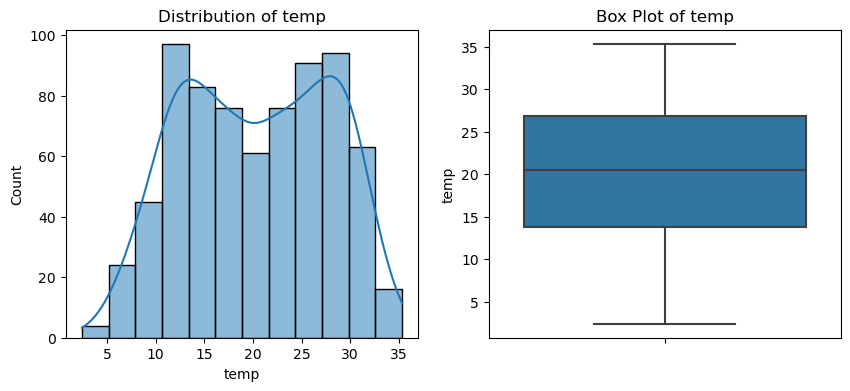

Column: atemp, Missing Data: 0.00%


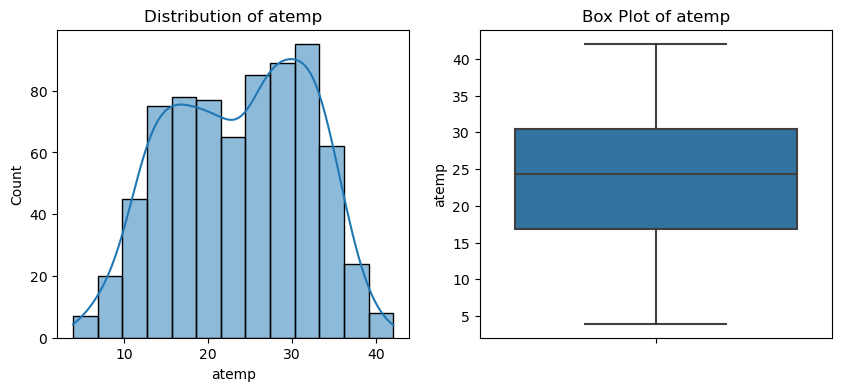

Column: humidity, Missing Data: 0.00%


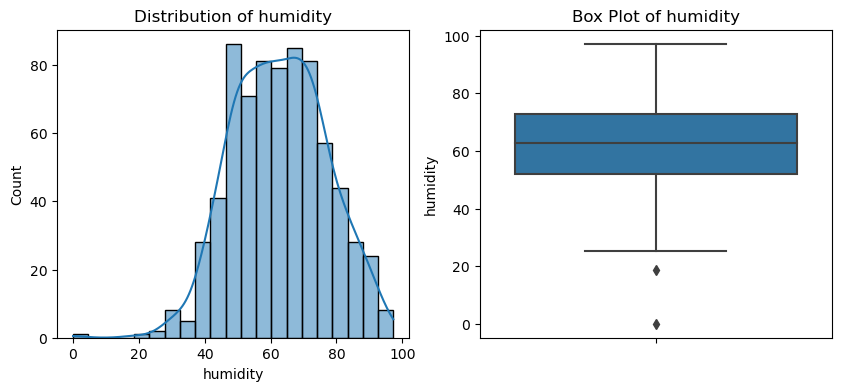

Column: windspeed, Missing Data: 0.00%


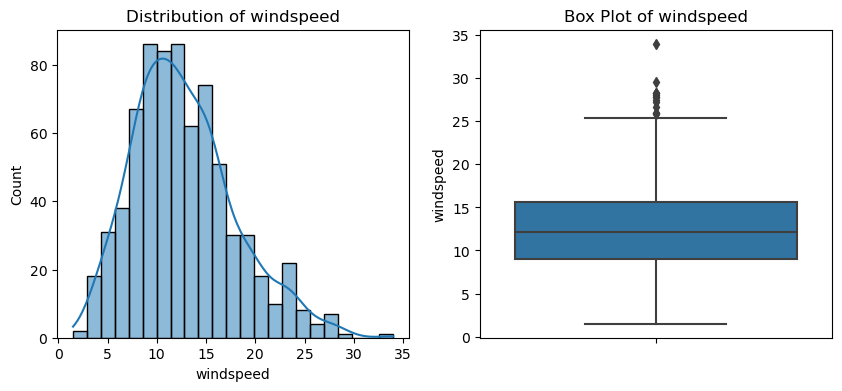

Column: cnt, Missing Data: 0.00%


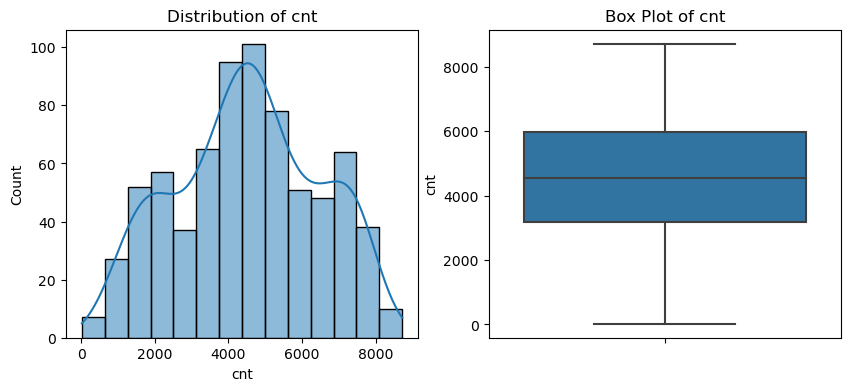

Column: season, Missing Data: 0.00%


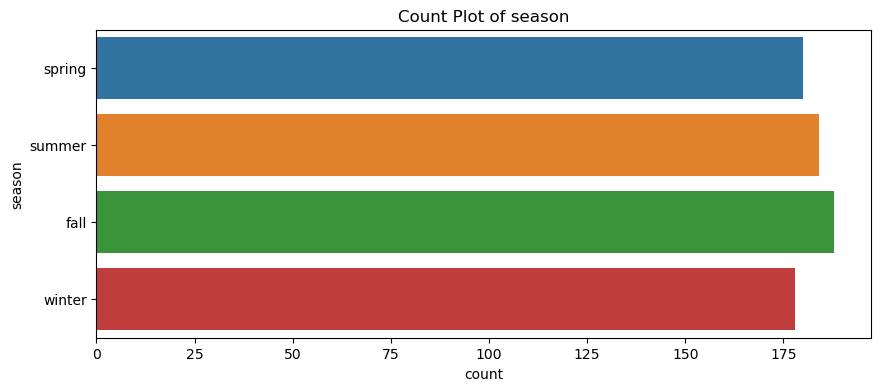

Column: year, Missing Data: 0.00%


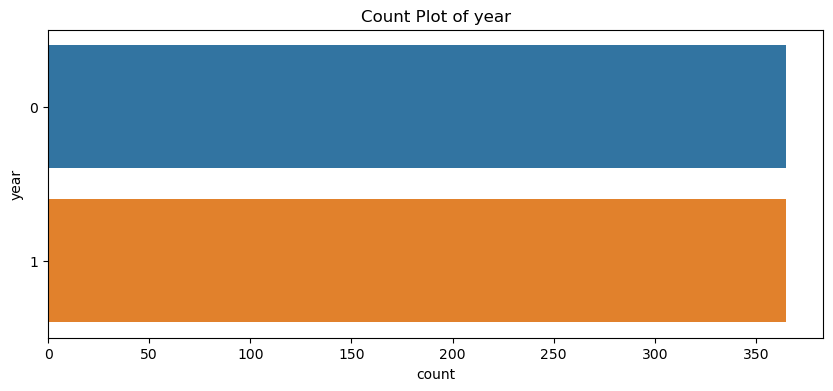

Column: month, Missing Data: 0.00%


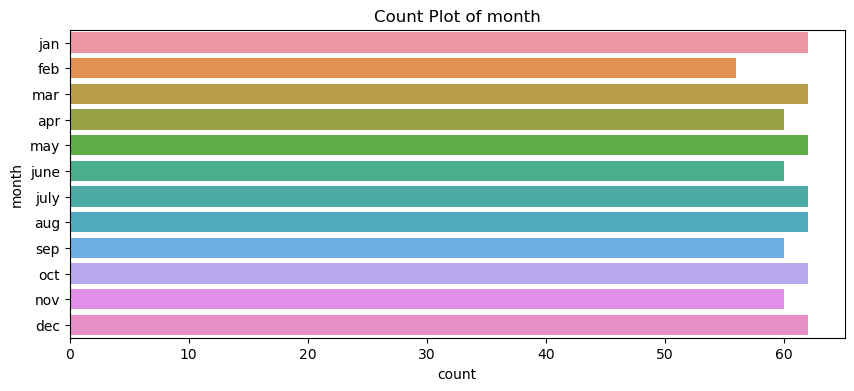

Column: holiday, Missing Data: 0.00%


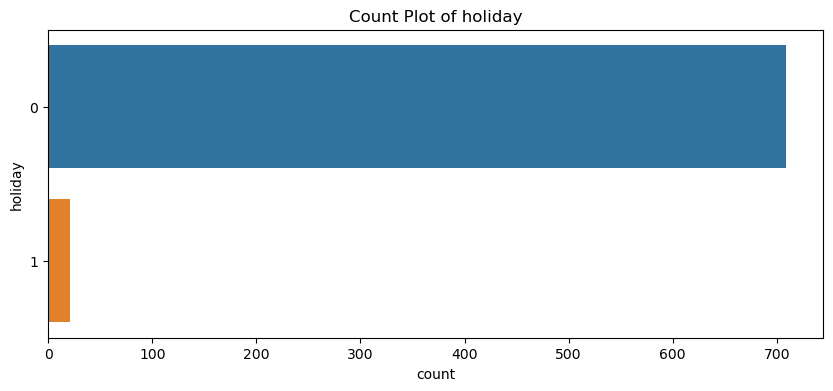

Column: weekday, Missing Data: 0.00%


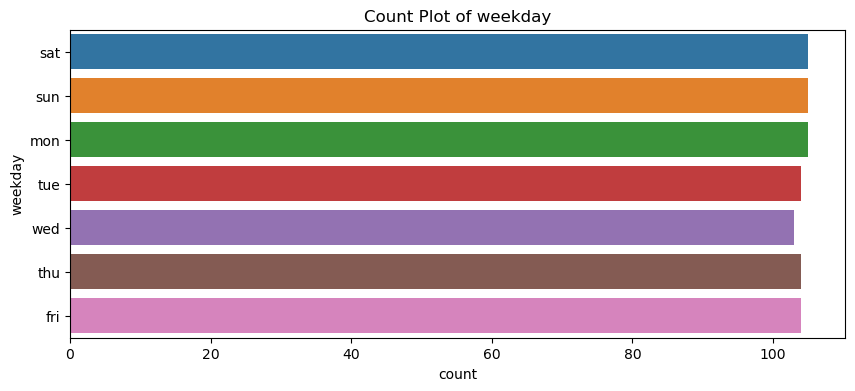

Column: workingday, Missing Data: 0.00%


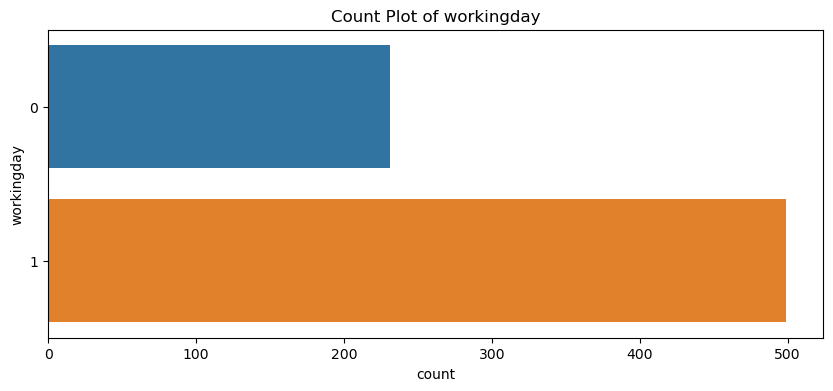

Column: weathersit, Missing Data: 0.00%


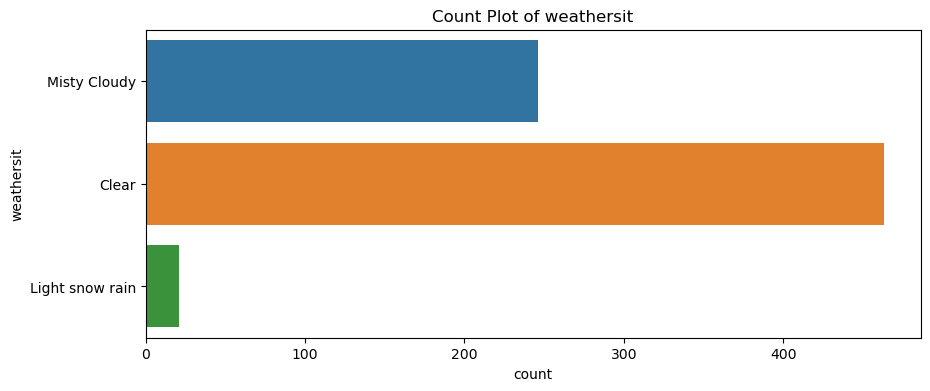

In [25]:
# Define a function for univariate analysis to draw the following only;

# distribution and box plot for numerical columns and;
# count plot for categorical columns

def univariate_analysis(df, column_list, plot_type='numerical'):
    for column in column_list:
        if column not in df.columns:
            print(f"Column {column} not found in dataframe.")
            continue

        missing_percentage = df[column].isna().sum() / len(df) * 100
        print(f"Column: {column}, Missing Data: {missing_percentage:.2f}%")

        if missing_percentage < 30:
            plt.figure(figsize=(10, 4))

            if plot_type == 'numerical':
                # Distribution plot for numerical data
                plt.subplot(1, 2, 1)
                sns.histplot(df[column].dropna(), kde=True)
                plt.title(f'Distribution of {column}')

                plt.subplot(1, 2, 2)
                sns.boxplot(y=df[column].dropna())
                plt.title(f'Box Plot of {column}')
            elif plot_type == 'categorical':
                # Count plot for categorical data
                sns.countplot(y=df[column].dropna())
                plt.title(f'Count Plot of {column}')
            
            plt.show()
        else:
            print(f"Skipping {column} due to high percentage of missing data.")

univariate_analysis(mlr_day_df, numerical_cols, plot_type='numerical')
univariate_analysis(mlr_day_df, categorical_cols, plot_type='categorical')

season


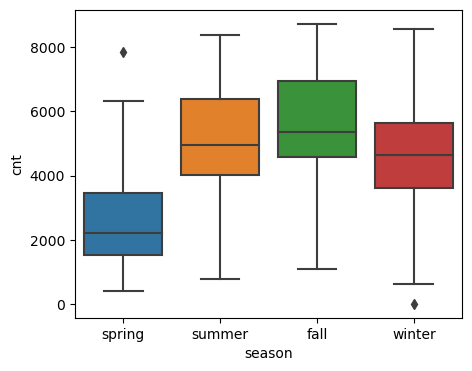

year


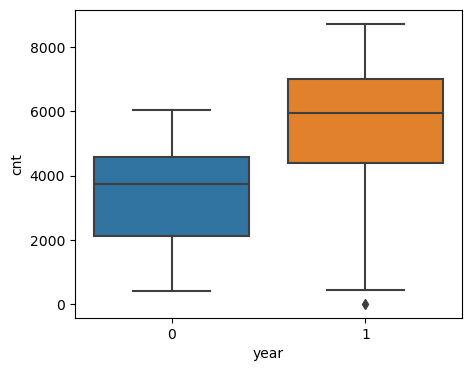

month


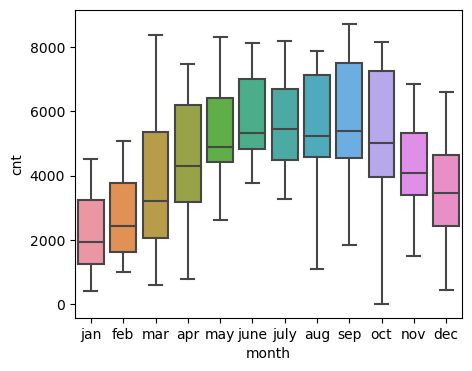

holiday


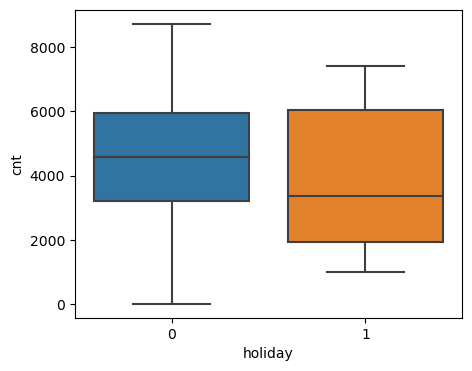

weekday


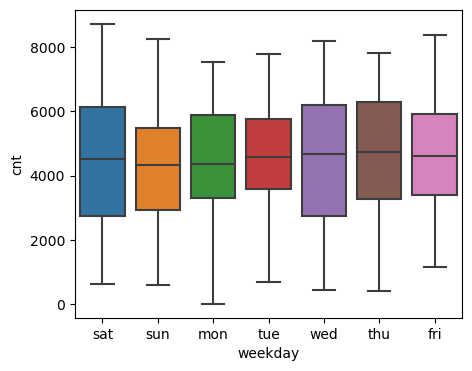

workingday


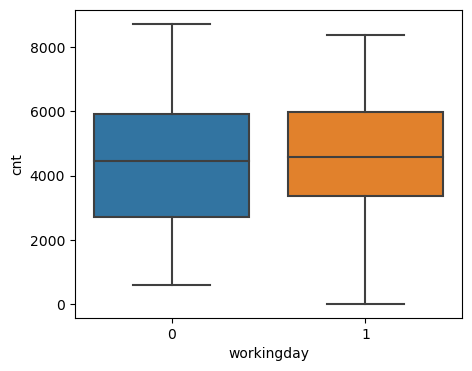

weathersit


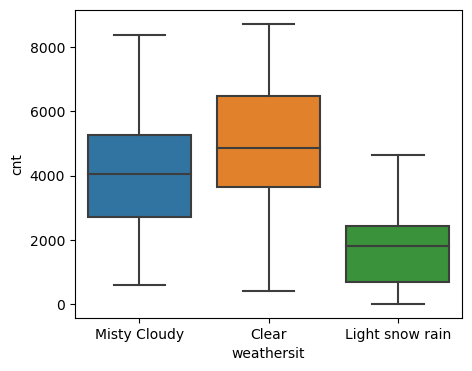

In [27]:
# Bivariate analysis - Box plots for all categorical predictor variables against the target variable cnt

for col1 in categorical_cols:
        print(col1)
        plt.figure(figsize=(5, 4))
        sns.boxplot(x=col1,y='cnt', data = mlr_day_df)
        plt.show()



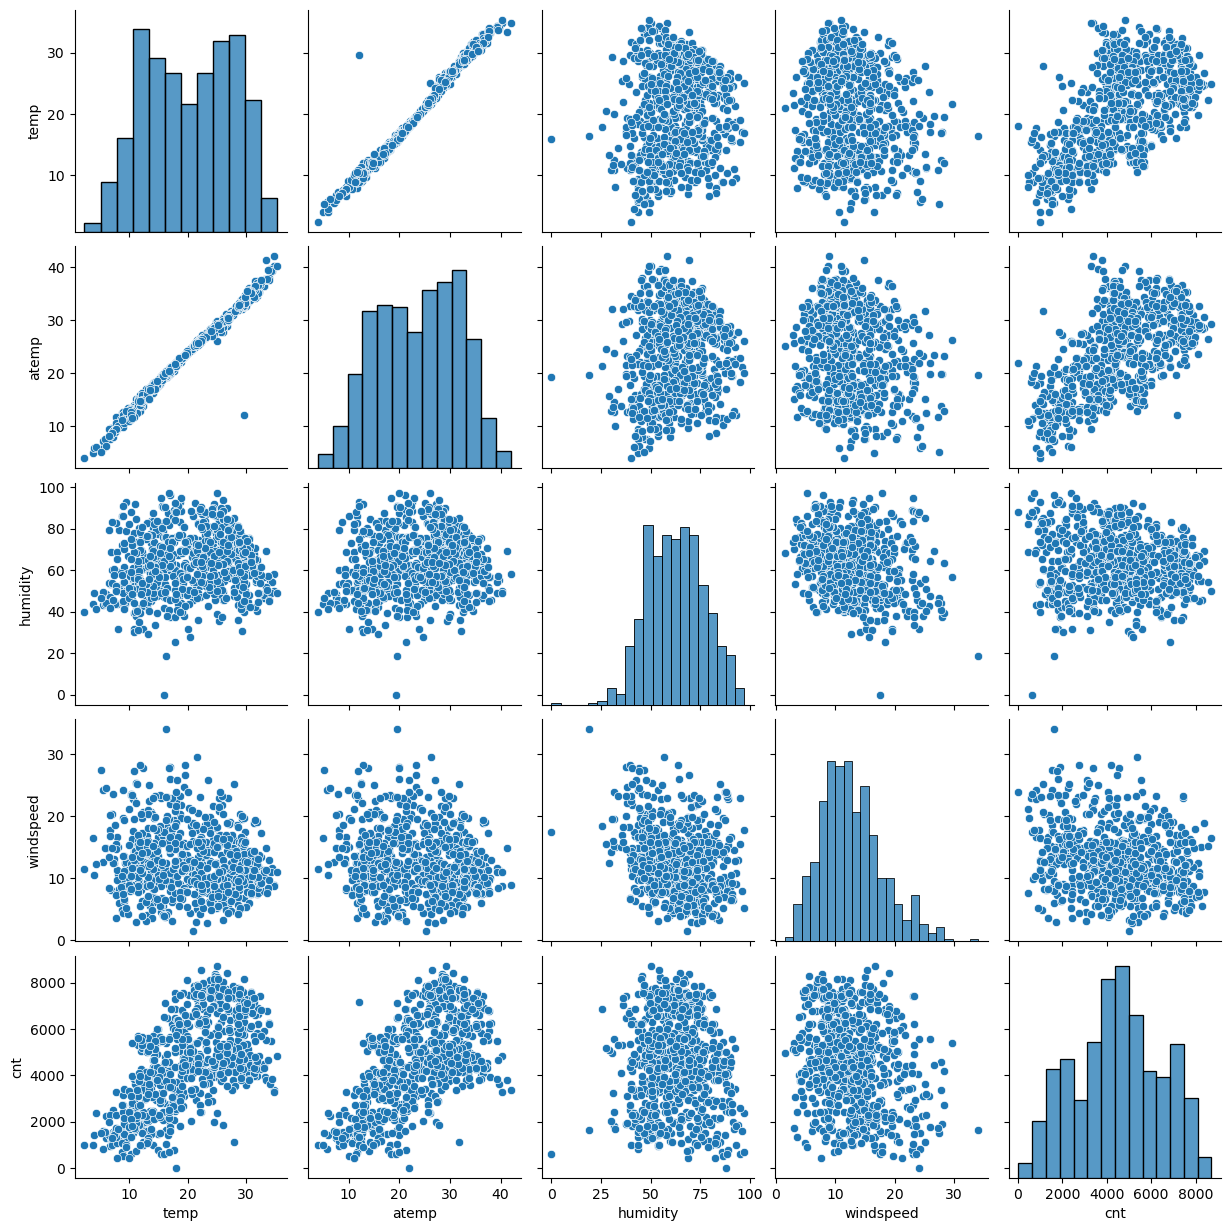

In [29]:
# Pairplots 

sns.pairplot(data=mlr_day_df,vars=numerical_cols)
plt.show()


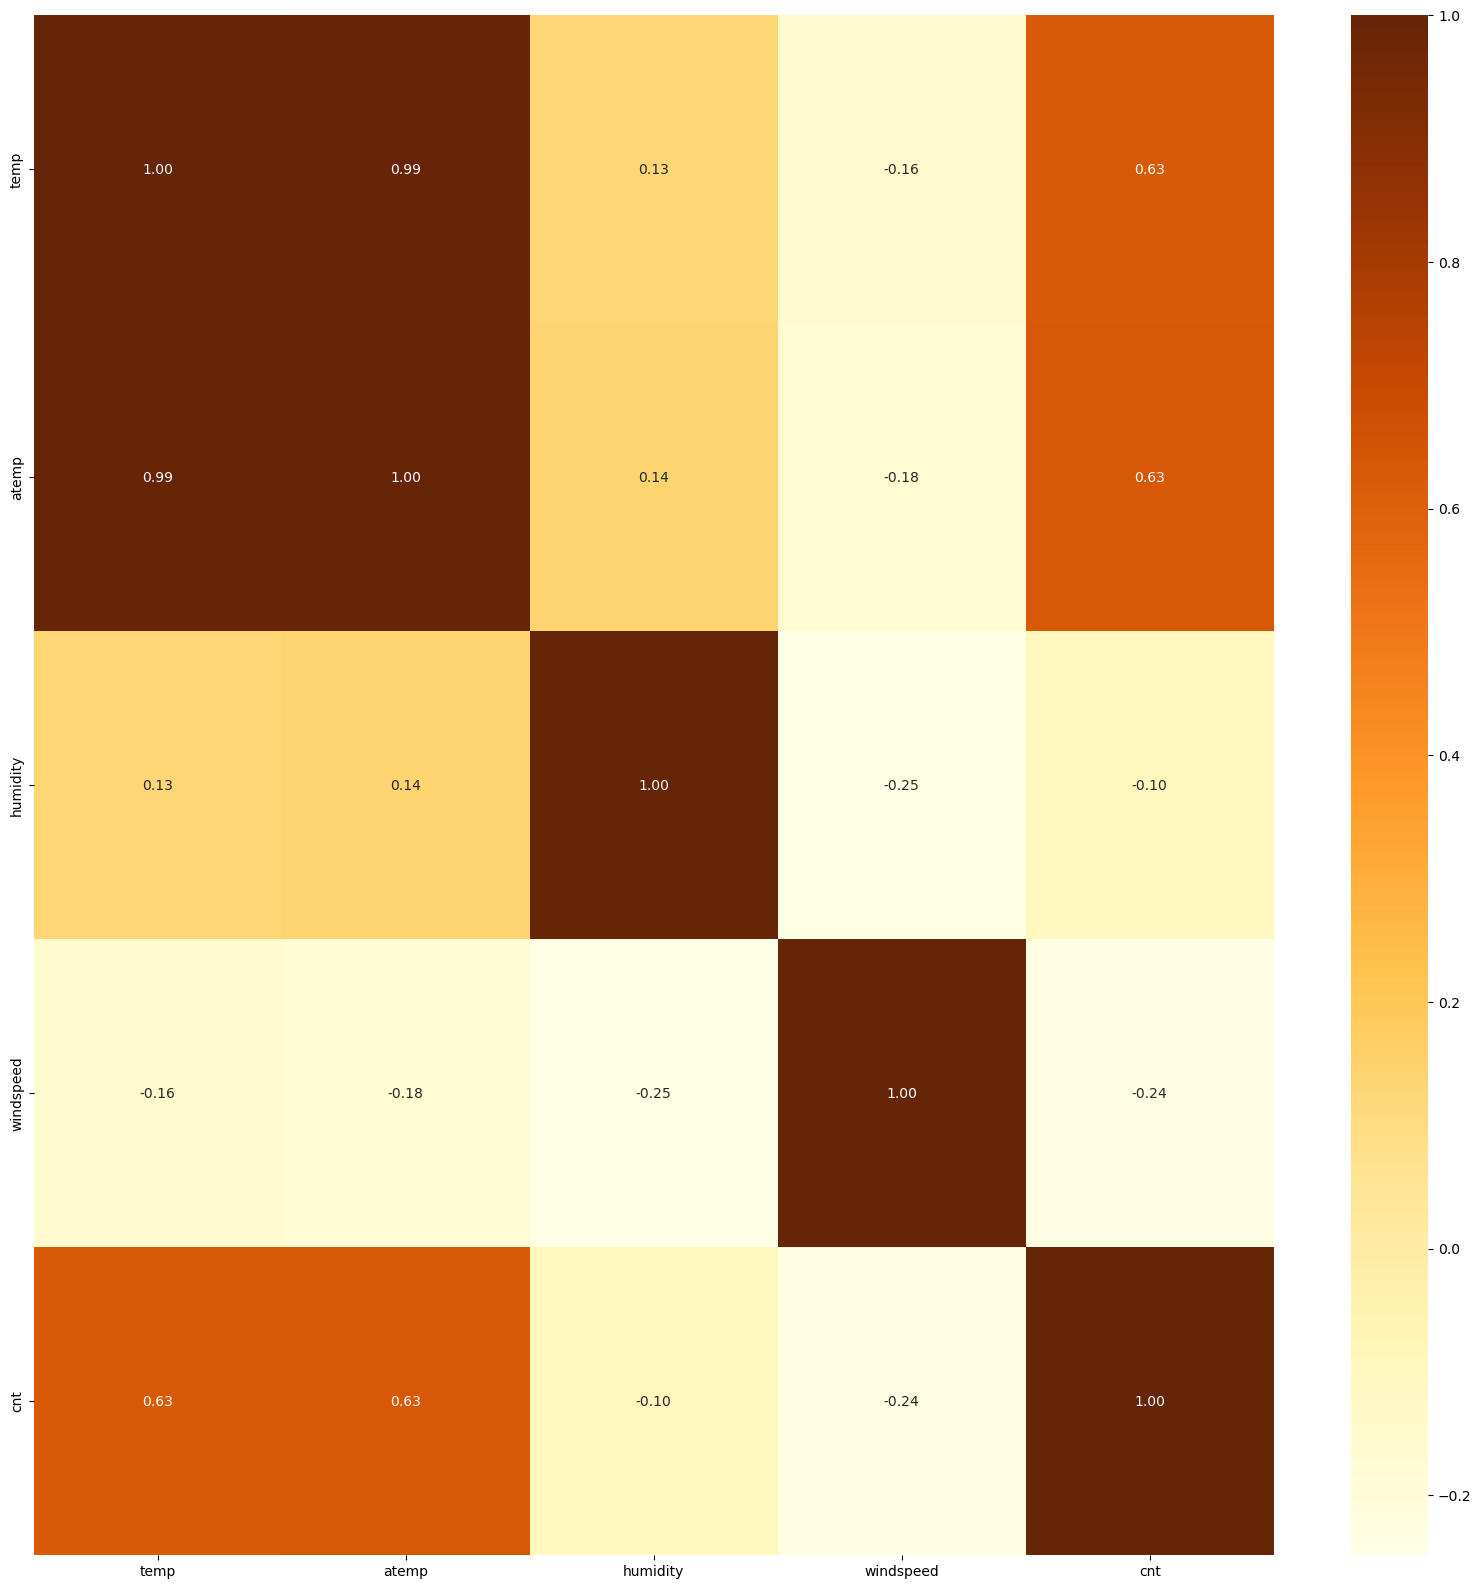

In [32]:
# Correlations
plt.figure(figsize=(20,20))
sns.heatmap(mlr_day_df[numerical_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()


#### There is a high positive correlation between temp and atemp. We will need to remove one of these columns based on VIF due to multicollinearity

 #### S4:Create dummy variables for all categorical variables where no. categories > 2

In [33]:
#Creating dummy columns for the categorical columns -weathersit, month, season and weekday - they have categories >2 each

weathersit_dummies_df=pd.get_dummies(mlr_day_df.weathersit,drop_first=True)
months_dummies_df=pd.get_dummies(mlr_day_df.month,drop_first=True)
seasons_dummies_df=pd.get_dummies(mlr_day_df.season,drop_first=True)
weekdays_dummies_df=pd.get_dummies(mlr_day_df.weekday,drop_first=True)


In [34]:
# Concat these additional columns to a new dataset and drop the source columns 

mlr_day_new_df=pd.concat([mlr_day_df,weathersit_dummies_df,months_dummies_df,seasons_dummies_df,weekdays_dummies_df],axis=1)

mlr_day_new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   year             730 non-null    int64  
 2   month            730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   humidity         730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  Light snow rain  730 non-null    uint8  
 13  Misty Cloudy     730 non-null    uint8  
 14  aug              730 non-null    uint8  
 15  dec              730 non-null    uint8  
 16  feb              730 non-null    uint8  
 17  jan             

In [35]:
mlr_day_new_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Misty Cloudy,14.11,18.18,80.58,10.75,985,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty Cloudy,14.90,17.69,69.61,16.65,801,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.05,9.47,43.73,16.64,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.20,10.61,59.04,10.74,1562,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.31,11.46,43.70,12.52,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [36]:
#Dropping the original source columns from the new dataset
mlr_day_new_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
mlr_day_new_df.shape

(730, 30)

In [38]:
mlr_day_new_df.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,0,0,14.11,18.18,80.58,10.75,985,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,14.90,17.69,69.61,16.65,801,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


 #### S5:Train Test Split

In [54]:
#Splitting the dataset into train and test datasets

np.random.seed(0)
df_train, df_test = train_test_split(mlr_day_new_df, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


 #### S6:Missing value imputation

In [55]:
# checking for missing or null values in the new data

mlr_day_new_df.isnull().sum()

year               0
holiday            0
workingday         0
temp               0
atemp              0
humidity           0
windspeed          0
cnt                0
Light snow rain    0
Misty Cloudy       0
aug                0
dec                0
feb                0
jan                0
july               0
june               0
mar                0
may                0
nov                0
oct                0
sep                0
spring             0
summer             0
winter             0
mon                0
sat                0
sun                0
thu                0
tue                0
wed                0
dtype: int64

In [56]:
df_train.isnull().sum()

year               0
holiday            0
workingday         0
temp               0
atemp              0
humidity           0
windspeed          0
cnt                0
Light snow rain    0
Misty Cloudy       0
aug                0
dec                0
feb                0
jan                0
july               0
june               0
mar                0
may                0
nov                0
oct                0
sep                0
spring             0
summer             0
winter             0
mon                0
sat                0
sun                0
thu                0
tue                0
wed                0
dtype: int64

#### No missing values on the training or new datasets, so imputation not required.

 #### S7:Scaling

In [57]:
# Using MinMaxScaler to rescale the numerical features - they are the same columns as originally identified as below
# numerical_cols=['temp','atemp','humidity','windspeed','cnt']

scaler = MinMaxScaler()

df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])


In [58]:

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
576,1,0,1,0.8152,0.7664,0.7256,0.2647,0.8277,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.4424,0.4390,0.6402,0.2553,0.4653,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
728,1,0,0,0.2451,0.2003,0.4981,0.6631,0.2041,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.3957,0.3917,0.5045,0.1885,0.4830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
111,0,0,1,0.3458,0.3188,0.7518,0.3810,0.1911,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5078,0.0255,0.6765,0.5374,0.5132,0.6505,0.3209,0.5135,0.0294,0.3451,0.0961,0.0843,0.0667,0.0882,0.0765,0.0765,0.0980,0.0843,0.0863,0.0843,0.0804,0.2431,0.2471,0.2471,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588
std,0.5004,0.1578,0.4683,0.2259,0.2124,0.1458,0.1698,0.2244,0.1691,0.4759,0.2950,0.2781,0.2497,0.2839,0.2660,0.2660,0.2977,0.2781,0.2810,0.2781,0.2722,0.4294,0.4317,0.4317,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3399,0.3321,0.5386,0.1992,0.3564,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5426,0.5297,0.6537,0.2968,0.5186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7352,0.6885,0.7548,0.4144,0.6847,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


 #### S8:Feature Selection

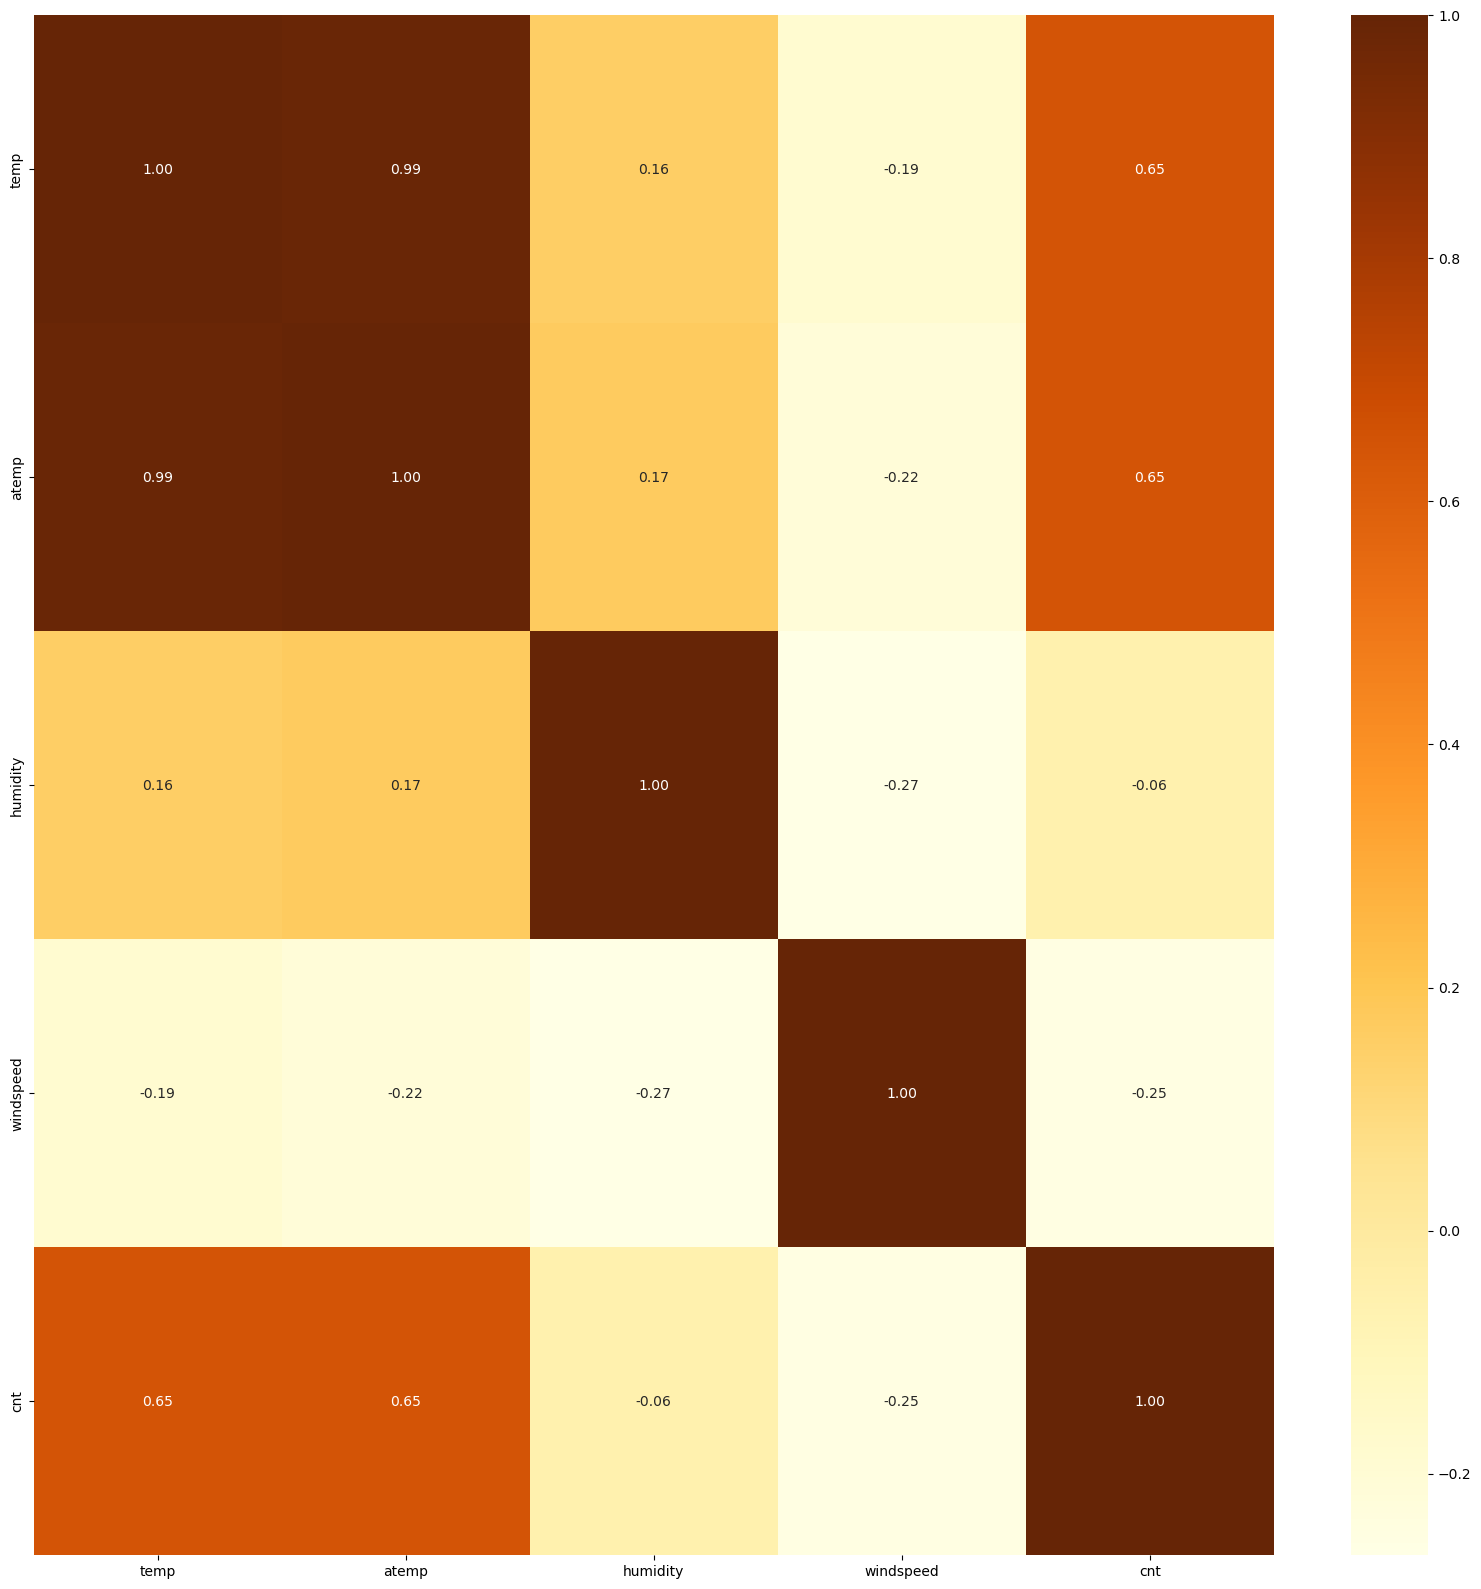

In [60]:
# Checking Correlations on the train dataset for the numerical cols
plt.figure(figsize=(20,20))
sns.heatmap(df_train[numerical_cols].corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

#### Temp and atemp appears strongly correlated with cnt - lets confirm this through a scatter plot

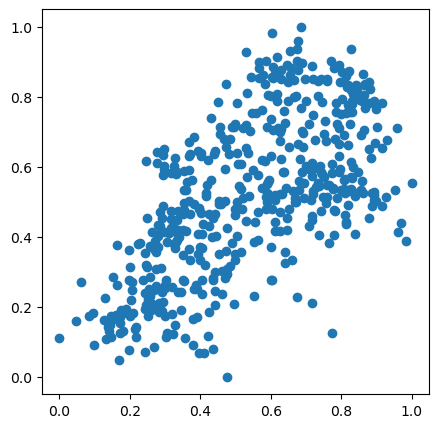

In [61]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [62]:
# RFE to eliminate low significance features recursively

y_train = df_train.pop('cnt')
X_train = df_train

In [66]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=12)
rfe_fit = rfe.fit(X_train, y_train)

In [67]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Light snow rain', True, 1),
 ('Misty Cloudy', True, 1),
 ('aug', False, 10),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('july', True, 1),
 ('june', False, 17),
 ('mar', False, 18),
 ('may', False, 9),
 ('nov', False, 5),
 ('oct', False, 16),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 12),
 ('sat', False, 2),
 ('sun', False, 11),
 ('thu', False, 14),
 ('tue', False, 13),
 ('wed', False, 15)]

In [68]:
# selecting the selected variable via RFE in col list

selected_cols = X_train.columns[rfe.support_]
print(selected_cols)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Light snow rain', 'Misty Cloudy', 'july', 'sep', 'spring', 'summer', 'winter'], dtype='object')


In [69]:
# printing the rejected variable via RFE in col list

rejected_cols = X_train.columns[rfe.support_==False]
print(rejected_cols)

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype='object')


#### This step involves manually checking the VIF and P values for a few more variables to eliminate the variables that have either high VIF or do not have explanatory power

In [72]:
# Writing a function to check VIF

def checkVIF(inp_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = inp_df.columns
    vif_df['VIF'] = [variance_inflation_factor(inp_df.values, i) for i in range(inp_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by = "VIF", ascending = False)
    return vif_df 

In [73]:
X_train_rfe = X_train[selected_cols]
# calculate VIF

checkVIF(X_train_rfe.astype(float))

,Features,VIF
3,humidity,28.0300
2,temp,16.0300
4,windspeed,4.6500
9,spring,4.0100
11,winter,3.3300
10,summer,2.7900
6,Misty Cloudy,2.2800
0,year,2.0800
7,july,1.5800
8,sep,1.3800


 #### S9:Model Building and Manually eliminating some of the least significant and highly correlated features

In [75]:
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.95e-190
Time:                        07:15:10   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2848      0.034     

In [78]:
#Drop humidity due to high VIF and refit the model

X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)

checkVIF(X_train_rfe.astype(float))

,Features,VIF
2,temp,5.0900
3,windspeed,4.6000
9,summer,2.2300
8,spring,2.0800
0,year,2.0700
10,winter,1.7800
6,july,1.5800
5,Misty Cloudy,1.5500
7,sep,1.3400
4,Light snow rain,1.0800


In [79]:
#Refit the model
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_lm.astype(float)).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.06e-187
Time:                        07:18:29   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030     

### This is a baselined version of the model because the p values are significant for all the independent variables and the VIF is <=5/6

### Also R2, adjusted R2 values are over 83%. F statistic is 229.6 which indicates that the model fit is not by chance.

 #### Analysis of the model summary values and key factors such as multicollinearity, correlation, VIF, and normality of error terms
    

In [80]:

lr.params

const              0.1994
year               0.2336
holiday           -0.0975
temp               0.4910
windspeed         -0.1479
Light snow rain   -0.2842
Misty Cloudy      -0.0802
july              -0.0521
sep                0.0768
spring            -0.0672
summer             0.0465
winter             0.0817
dtype: float64

In [81]:
X_train_lm

,const,year,holiday,temp,windspeed,Light snow rain,Misty Cloudy,july,sep,spring,summer,winter
576,1.0000,1,0,0.8152,0.2647,0,0,1,0,0,0,0
426,1.0000,1,0,0.4424,0.2553,0,1,0,0,1,0,0
728,1.0000,1,0,0.2451,0.6631,0,0,0,0,1,0,0
482,1.0000,1,0,0.3957,0.1885,0,1,0,0,0,1,0
111,1.0000,0,0,0.3458,0.3810,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0000,1,0,0.8640,0.1871,0,0,0,0,0,0,0
53,1.0000,0,0,0.2026,0.1114,0,0,0,0,1,0,0
350,1.0000,0,0,0.2482,0.4318,0,1,0,0,0,0,1
79,1.0000,0,0,0.4627,0.5299,0,1,0,0,0,1,0


In [82]:
#Create prediction based on trained data
y_train_pred = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

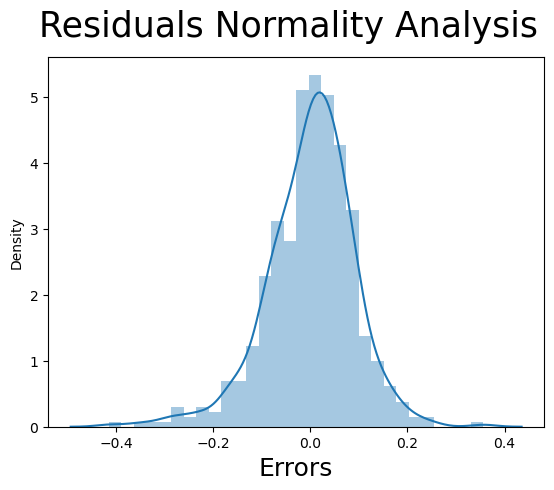

In [84]:
# Plot a histogram of the residuals

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Residuals Normality Analysis', fontsize = 25) 
plt.xlabel('Errors', fontsize = 18)

In [85]:
#VIF and Correlation for the independent numerical variables in the training dataset

checkVIF(X_train_rfe.astype(float))


,Features,VIF
2,temp,5.0900
3,windspeed,4.6000
9,summer,2.2300
8,spring,2.0800
0,year,2.0700
10,winter,1.7800
6,july,1.5800
5,Misty Cloudy,1.5500
7,sep,1.3400
4,Light snow rain,1.0800


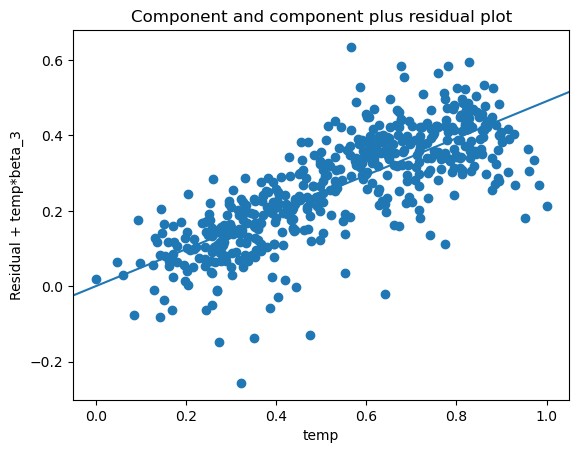

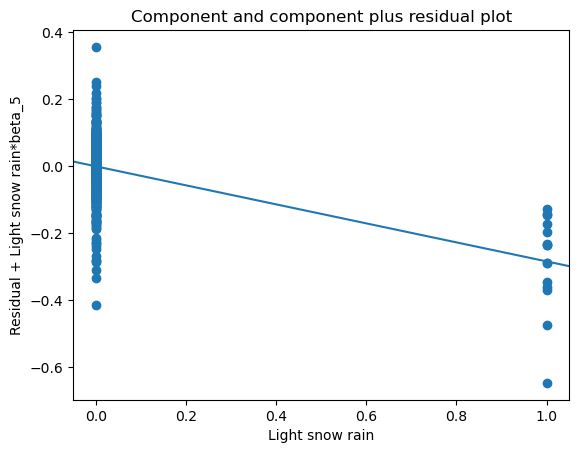

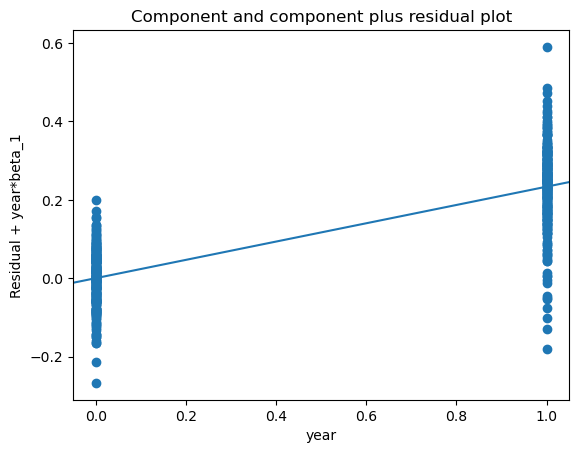

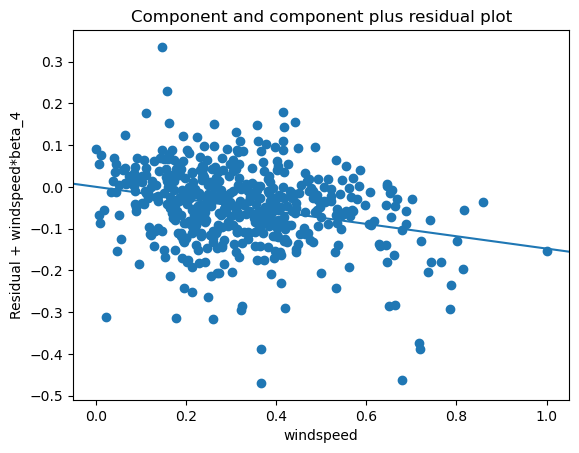

In [117]:
# Checking Linear relationship with CCPR plot (Component and component plus residual plot)

sm.graphics.plot_ccpr(lr, 'temp')
plt.show()


sm.graphics.plot_ccpr(lr, 'Light snow rain')
plt.show()

sm.graphics.plot_ccpr(lr, 'year')
plt.show()

sm.graphics.plot_ccpr(lr, 'windspeed')
plt.show()

 


Text(0, 0.5, 'residuals')

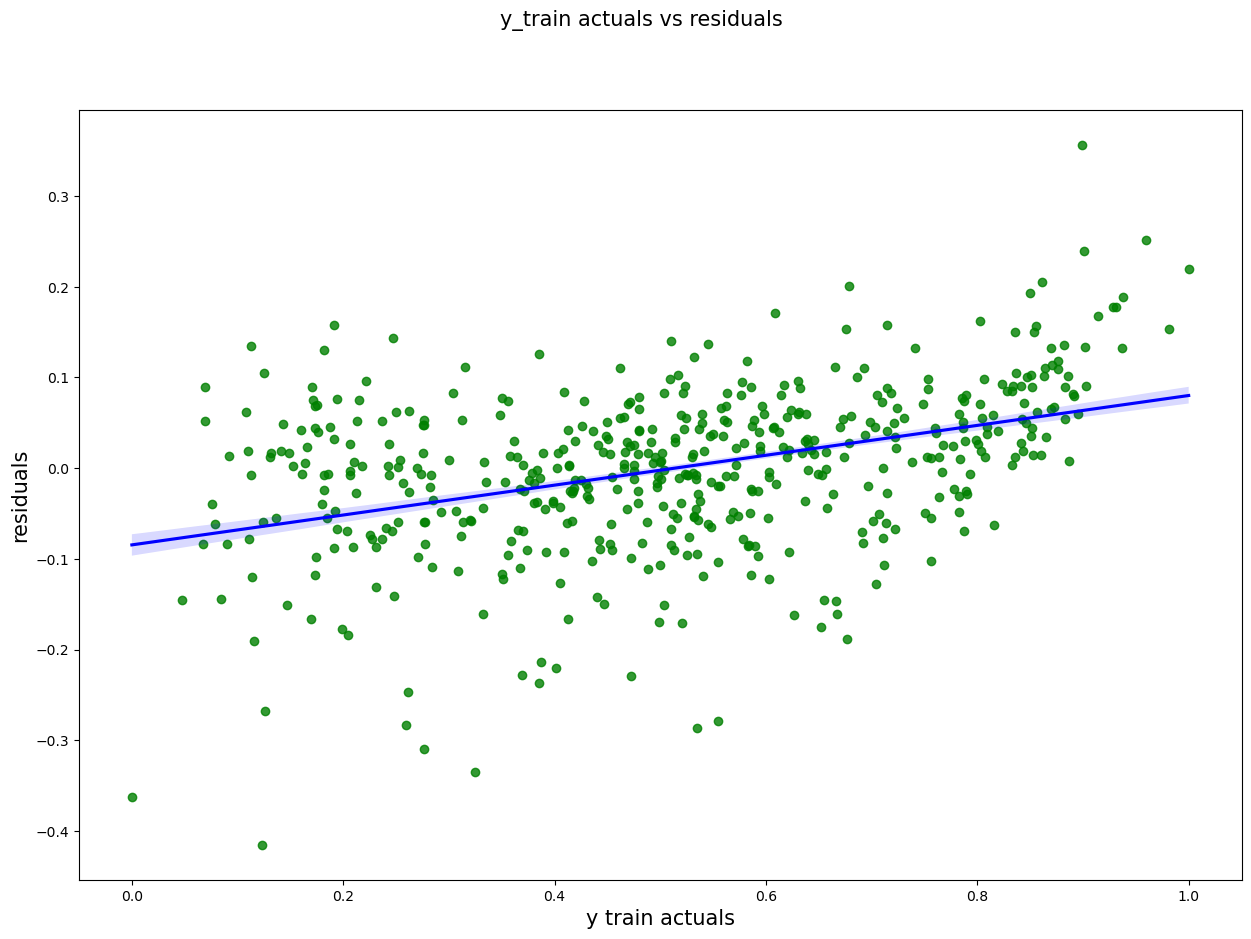

In [120]:
# Regplot - (y_train - y_train_pred)
# Homoscedasticity Testing

fig=plt.figure(figsize=(15,10))
residual = y_train - y_train_pred
sns.regplot(x=y_train.astype(float), y=residual.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "blue"})
fig.suptitle('y_train actuals vs residuals', fontsize = 15) 
plt.xlabel('y train actuals', fontsize = 15)
plt.ylabel('residuals', fontsize = 15) 

#### There is a linear relation from the numeric independent variables to the target and the error values do not show any 
#### visible patterns thereby demonstrating Homoscedasticity. 

#### Durbin-Watson value is 2.051, which means that there is no auto-correlation.

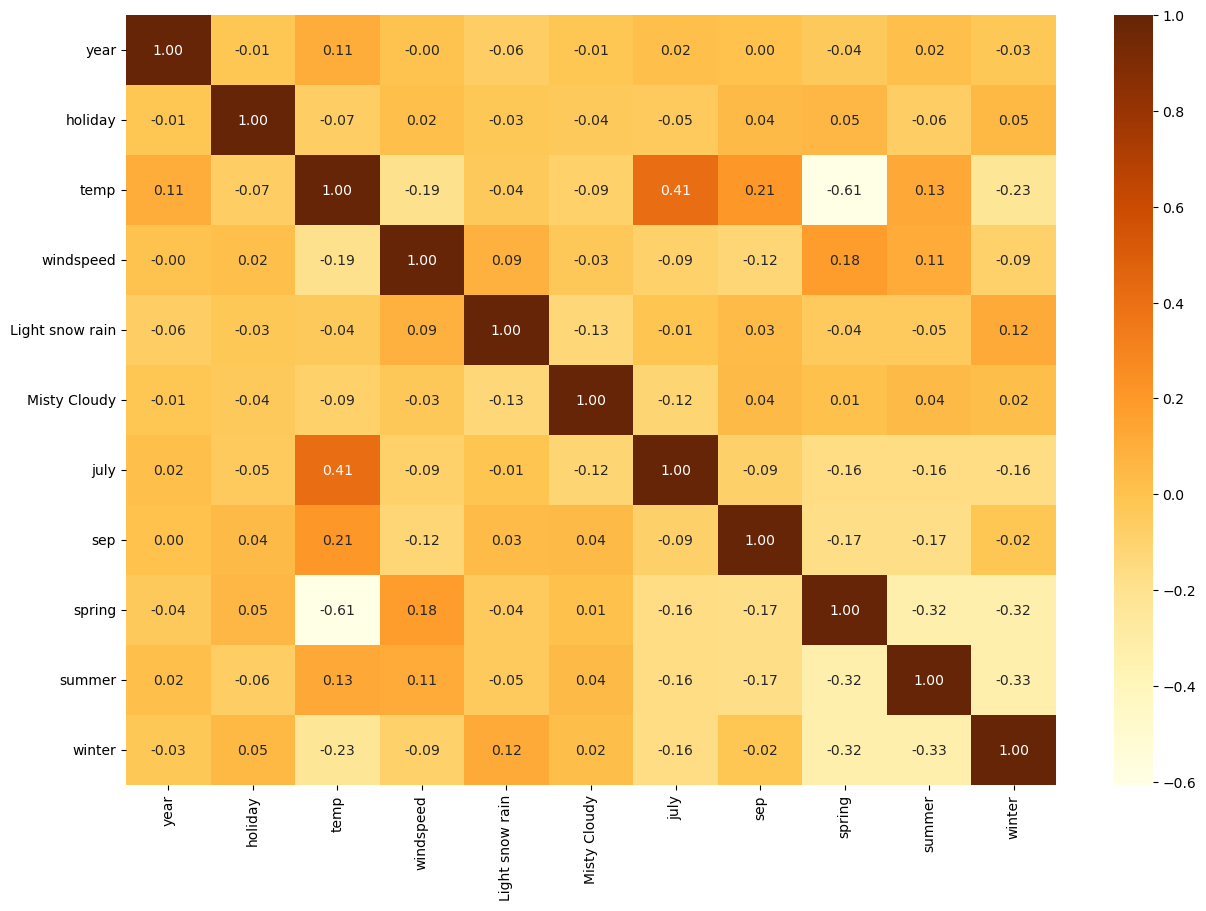

In [86]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_rfe.corr(),annot=True,fmt='.2f',cmap="YlOrBr")
plt.show()

### The analysis shows that the error terms are normally distributed and there are no highly correlated variables and VIF<=~5. Therefore we can move ahead with this model for prediction on the test dataset

In [89]:
# Prepare the test dataset for applying predictions

# MinMaxScaler using the scaler object defined before - Not required to fit_transform, only transform is sufficientb
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
df_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
184,0,1,0,0.8318,0.7697,0.6574,0.0842,0.6927,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.9014,0.8426,0.6101,0.1537,0.7120,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.5120,0.4961,0.8377,0.3342,0.3034,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
221,0,0,1,0.8816,0.7953,0.4371,0.3396,0.5474,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.8172,0.7415,0.3143,0.5374,0.5690,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [90]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Light snow rain,Misty Cloudy,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,spring,summer,winter,mon,sat,sun,thu,tue,wed
count,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000,220.0000
mean,0.4818,0.0364,0.7000,0.5587,0.5328,0.6382,0.3133,0.5222,0.0273,0.3182,0.0591,0.0864,0.1000,0.0773,0.1045,0.0955,0.0545,0.0864,0.0727,0.0864,0.0864,0.2545,0.2636,0.2364,0.1273,0.1182,0.1455,0.1636,0.1682,0.1000
std,0.5008,0.1876,0.4593,0.2332,0.2174,0.1487,0.1596,0.2192,0.1632,0.4668,0.2363,0.2815,0.3007,0.2676,0.3067,0.2945,0.2276,0.2815,0.2603,0.2815,0.2815,0.4366,0.4416,0.4258,0.3340,0.3236,0.3534,0.3708,0.3749,0.3007
min,0.0000,0.0000,0.0000,0.0466,0.0260,0.2619,-0.0428,0.0482,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3554,0.3449,0.5292,0.1988,0.3786,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,1.0000,0.5582,0.5447,0.6256,0.3001,0.5247,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.7560,0.7133,0.7438,0.4027,0.6777,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,1.0000,1.0000,1.0000,0.9844,0.9809,1.0021,0.8075,0.9633,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [91]:
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
# Trim the columns that are not required (keep only the columns selected in the final X_train_rfe dataset)

X_test = X_test[X_train_rfe.columns]

In [96]:
X_test.shape

(220, 11)

In [97]:
# Add constant and predict the target value cnt in y_test_pred using lr model

X_test_lm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_lm)

#### S10:Evaluation (Train and Test Data) - R2 and Adjusted R2

In [110]:
#Get R2 score for test data
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8053

Text(0, 0.5, 'y test pred')

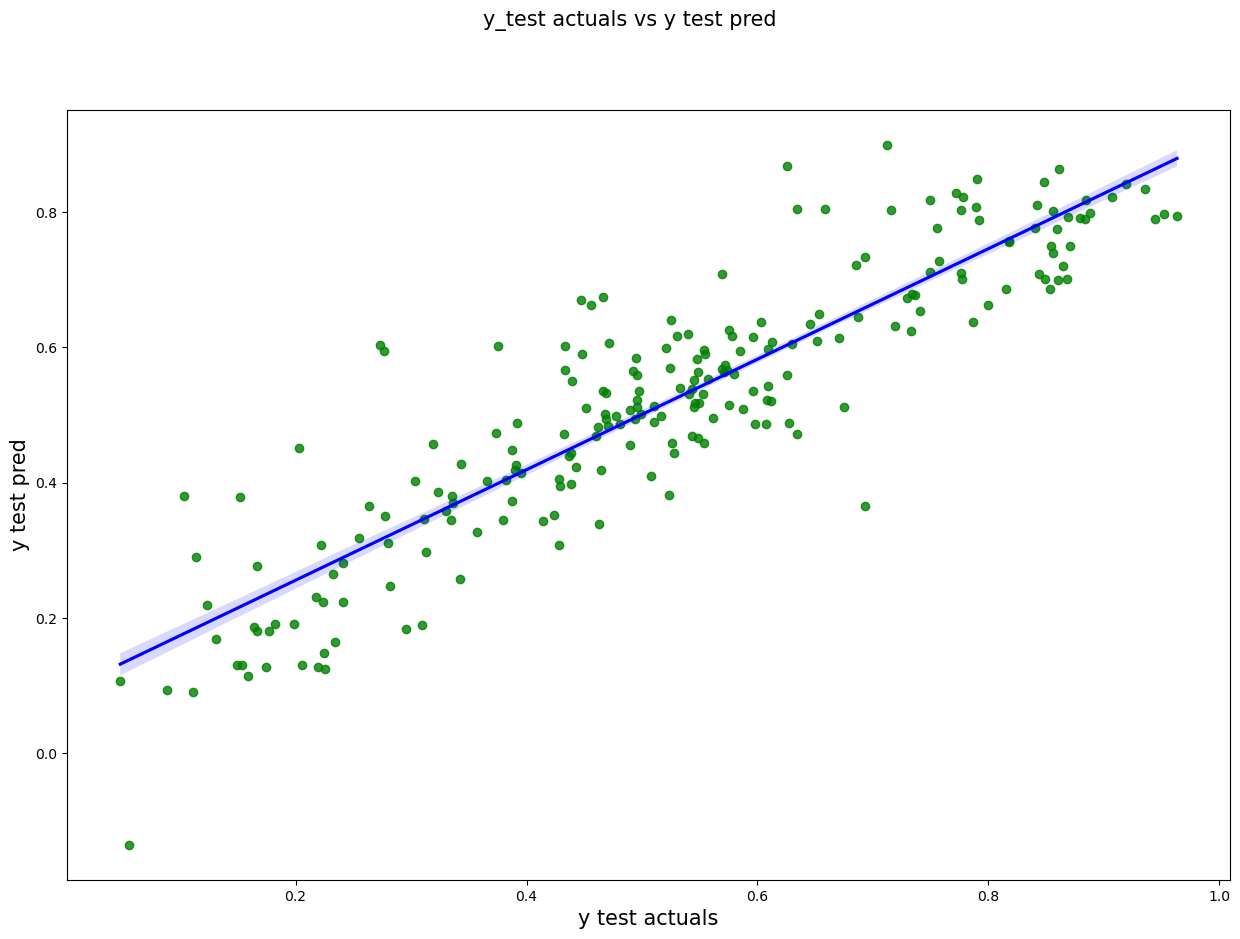

In [112]:
# Regplot - y_test and y_pred 

fig=plt.figure(figsize=(15,10))
#plt.scatter(y_test, y_test_pred)
sns.regplot(x=y_test.astype(float), y=y_test_pred.astype(float), ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "blue"})
fig.suptitle('y_test actuals vs y test pred', fontsize = 15) 
plt.xlabel('y test actuals', fontsize = 15)
plt.ylabel('y test pred', fontsize = 15) 

In [101]:
#Understand the coefficients of our fit and form the equation
round(lr.params,4)

const              0.1994
year               0.2336
holiday           -0.0975
temp               0.4910
windspeed         -0.1479
Light snow rain   -0.2842
Misty Cloudy      -0.0802
july              -0.0521
sep                0.0768
spring            -0.0672
summer             0.0465
winter             0.0817
dtype: float64

#### Equation 

𝑐𝑛𝑡=0.1994 + 0.2336×𝑦𝑒𝑎𝑟 ⎯0.0975×ℎ𝑜𝑙𝑖𝑑𝑎𝑦 + 0.4910×𝑡𝑒𝑚𝑝 ⎯0.1479×𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑 -0.2842×𝐿𝑖𝑔ℎ𝑡𝑠𝑛𝑜𝑤𝑟𝑎𝑖𝑛 -0.0802×𝑀𝑖𝑠𝑡𝑦Cloudy -0.0521×july + 0.0768×sep - 0.0672×𝑠𝑝𝑟𝑖𝑛𝑔 + 0.0465×𝑠𝑢𝑚𝑚𝑒𝑟 + 0.0817×𝑤𝑖𝑛𝑡𝑒𝑟

In [113]:
# Adjusted-R2 value for the test dataset

#X_test.shape

adjusted_test_r2 = round(1-((1-r2)*(X_test.shape[0]-1))/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_test_r2)

0.795


In [ ]:
### Train R2 = 0.835
### Train Adjusted R2 = 0.832

### Test R2 = 0.8053
### Test Adjusted R2 = 0.795

### Multiple Linear Regression Model completed